# Regular 6x6 TicTacToe

Note input in Arena in Coach.py was reversed for this training to work.

Parameters:

    args = dotdict({
        'numIters': 1000,
        'numEps': 100,
        'tempThreshold': 15,
        'updateThreshold': 0.55,
        'maxlenOfQueue': 200000,
        'numMCTSSims': 25,
        'arenaCompare': 40,
        'cpuct': 1,

        'checkpoint': './temp/',
        'load_model': True,
        'load_folder_file': ('temp','ttt6x6.pth.tar'),
        'numItersForTrainExamplesHistory': 20,

    })

    args = dotdict({
        'lr': 0.001,
        'dropout': 0.3,
        'epochs': 10,
        'batch_size': 64,
        'cuda': True,
        'num_channels': 512,
    })



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import re


debug = True

def db(x):
    if debug:
        print(x)

def extractVlossPerIteration(fileName):
    my_file=open(fileName,"r")
    data = []
    for line in my_file:
        if(line[:10] == "------ITER"):
            it = int(re.findall(r'\d+', line)[0])
        if(line[:-1] == "PITTING AGAINST PREVIOUS VERSION"):
            v_loss = float(re.findall(r'v_loss: \d.\d+', lastLine)[0][8:])
            # data.append([it,v_loss])
            data.append(v_loss)
            db("iteration: " + str(it) + " v_loss: " + str(v_loss))
        lastLine = line

    my_file.close()
    return data

def extractLossPerIteration(fileName):
    my_file=open(fileName,"r")
    loss = []
    pi_loss = []
    v_loss = []
    for line in my_file:
        if(line[:10] == "------ITER"):
            it = int(re.findall(r'\d+', line)[0])
        if(line[:-1] == "PITTING AGAINST PREVIOUS VERSION"):
            lossTemp = re.findall(r'- loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', lastLine)
            pi_lossTemp = re.findall(r'pi_loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', lastLine)
            v_lossTemp = re.findall(r'v_loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', lastLine)
            if lossTemp != []:
                lossTemp = float(lossTemp[0])
                loss.append(lossTemp)
            if pi_lossTemp != []:
                pi_lossTemp = float(pi_lossTemp[0])
                pi_loss.append(pi_lossTemp)
            if v_lossTemp != []:
                v_lossTemp = float(v_lossTemp[0])
                v_loss.append(v_lossTemp)
        lastLine = line
    my_file.close()
    return loss, pi_loss, v_loss

def extractLoss(fileName):
    my_file=open(fileName,"r")
    loss = []
    pi_loss = []
    v_loss = []
    for line in my_file:
        lossTemp = re.findall(r'- loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', line)
        pi_lossTemp = re.findall(r'pi_loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', line)
        v_lossTemp = re.findall(r'v_loss: ([+-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE]?[+\-]?\d+))', line)
        if lossTemp != []:
            lossTemp = float(lossTemp[0])
            loss.append(lossTemp)
        if pi_lossTemp != []:
            pi_lossTemp = float(pi_lossTemp[0])
            pi_loss.append(pi_lossTemp)
        if v_lossTemp != []:
            v_lossTemp = float(v_lossTemp[0])
            v_loss.append(v_lossTemp)
        # lastLine = line
    my_file.close()
    return loss, pi_loss, v_loss




def plot3sets(loss, pi_loss, v_loss):
    plt.subplots_adjust(hspace=0.4)
    plt.subplots_adjust(wspace=0.4)
    x = np.arange(1,len(loss) + 1, 1)

    # Plot loss
    plt.subplot(131)
    plt.plot(x, loss)
    plt.title('loss')
    plt.grid(True)

    # Plot pi_loss
    plt.subplot(132)
    plt.plot(x, pi_loss)
    plt.title('pi_loss')
    plt.grid(True)

    # Plot v_loss
    plt.subplot(133)
    plt.semilogy(x, v_loss)
    plt.title('v_loss')
    plt.grid(True)

    plt.show()

def plotNormAndLog(y):
    plt.rcParams['figure.figsize'] = [15, 10]
    # l = len(y)
    # y = y[int(0.3*l):int(0.4*l)]
    plt.subplots_adjust(hspace=0.4)
    plt.subplots_adjust(wspace=0.4)
    x = np.arange(1,len(y) + 1, 1)

    # Plot Linear
    plt.subplot(211)
    plt.plot(x, y)
    plt.title('Linear')
    plt.grid(True)

    # Plot Logarithmic
    plt.subplot(212)
    plt.semilogy(x, y)
    plt.title('Logarithmic')
    plt.grid(True)

    plt.show()





=====LOSS PER ITERATION=====
    LOSS


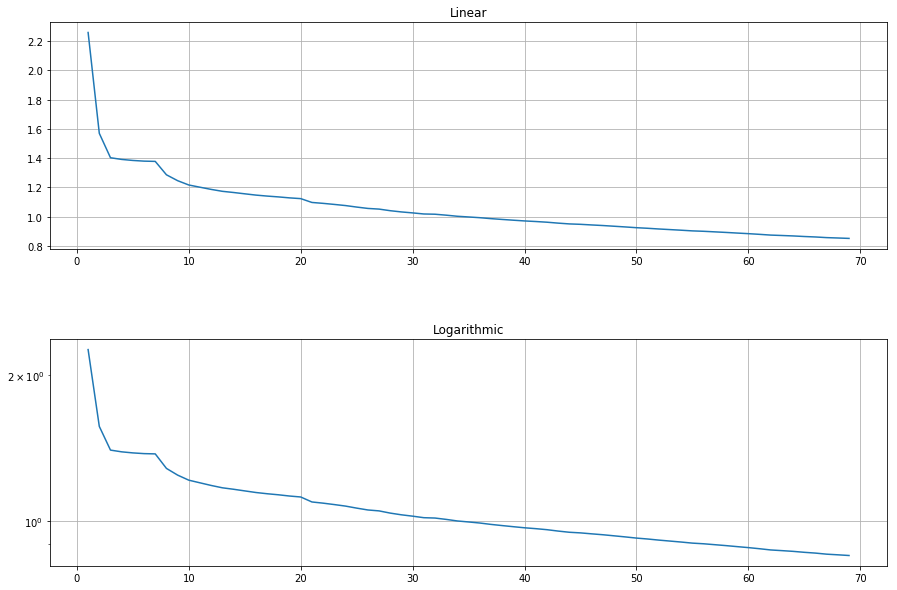

    PI_LOSS


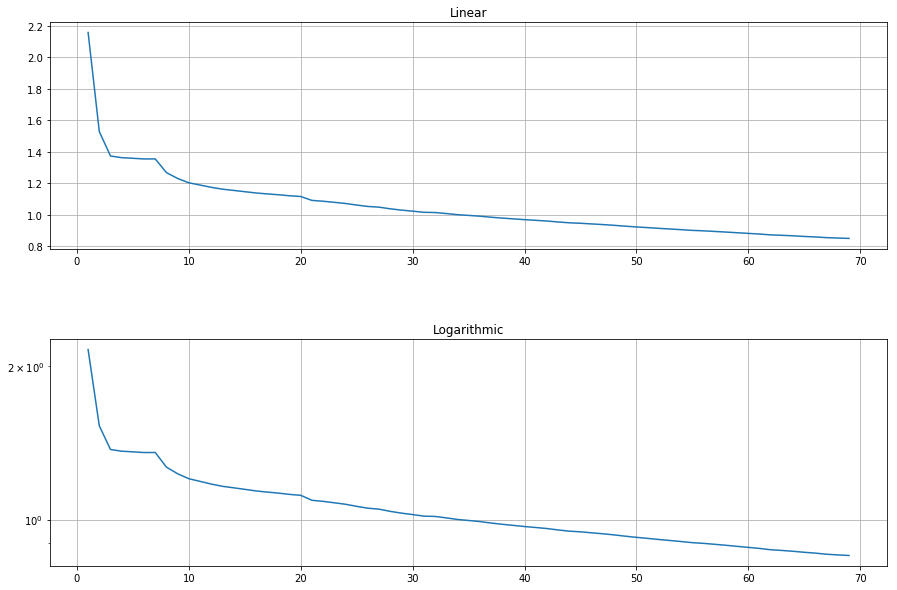

    V_LOSS


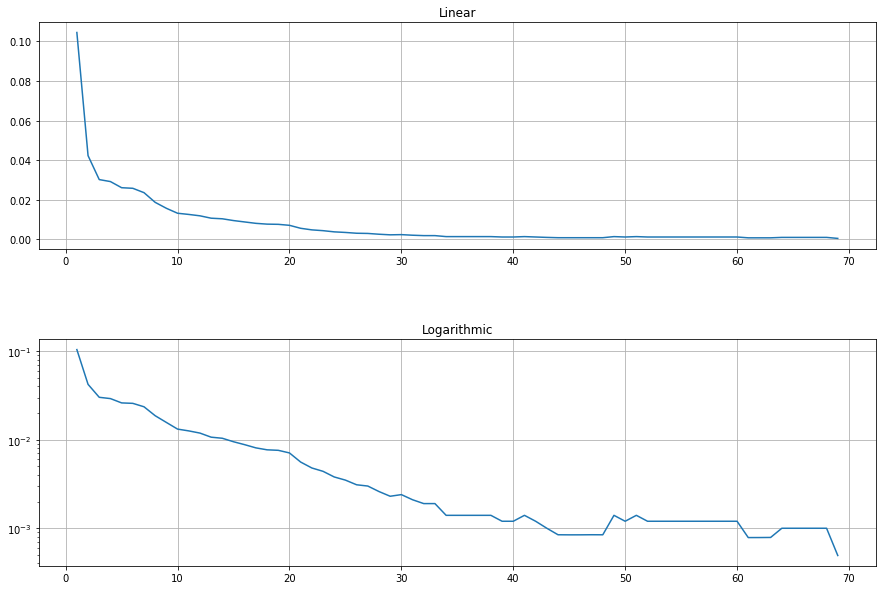

=====LOSS=====
    LOSS


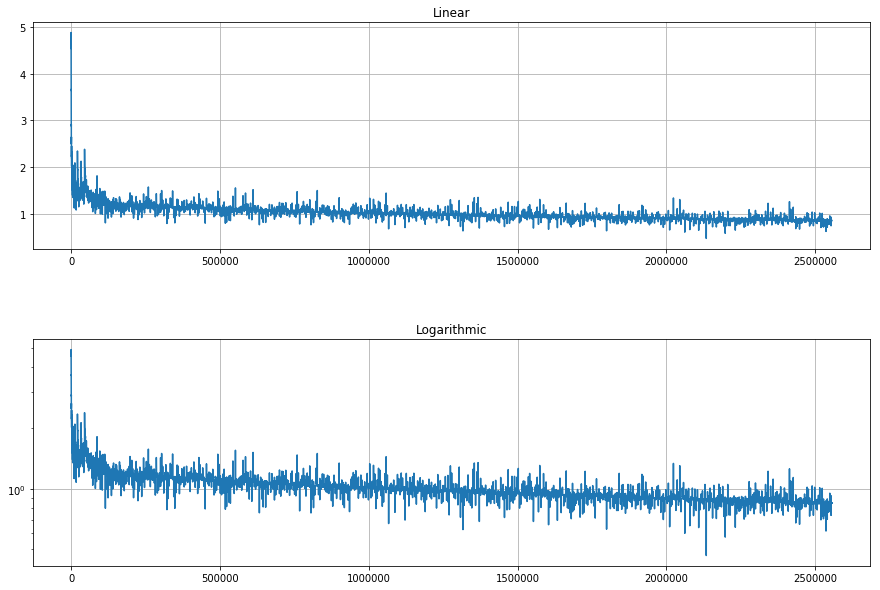

    PI_LOSS


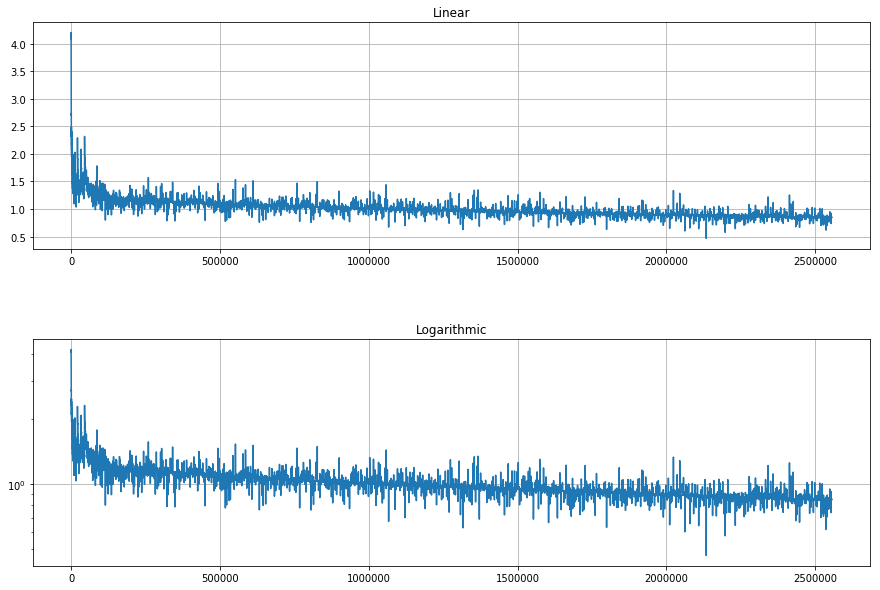

    V_LOSS


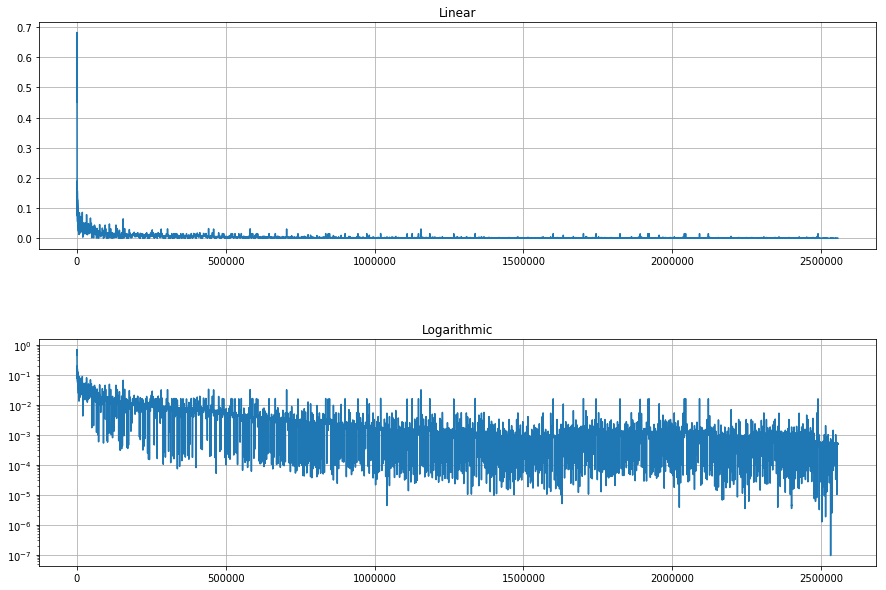

In [19]:
# y = extractVlossPerIteration("azg2.output")
# loss, pi_loss, v_loss = extractLoss("azg2.output")
# assert(len(loss)==len(pi_loss))
# assert(len(loss)==len(v_loss))
# plot3sets(loss, pi_loss, v_loss)

print("=====LOSS PER ITERATION=====")
loss, pi_loss, v_loss = extractLossPerIteration("azg5.output")
assert(len(loss)==len(pi_loss))
assert(len(loss)==len(v_loss))
print("    LOSS")
plotNormAndLog(loss)
print("    PI_LOSS")
plotNormAndLog(pi_loss)
print("    V_LOSS")
plotNormAndLog(v_loss)


print("=====LOSS=====")
loss, pi_loss, v_loss = extractLoss("azg5.output")
assert(len(loss)==len(pi_loss))
assert(len(loss)==len(v_loss))
print("    LOSS")
plotNormAndLog(loss)
print("    PI_LOSS")
plotNormAndLog(pi_loss)
print("    V_LOSS")
plotNormAndLog(v_loss)

